# **Activation Functions**

An activation function (sometimes also called a transfer function, or a non-
linearity) takes a floating-point number as input and returns a new floating-
point number as output. We can define these functions by drawing them
as little graphs, without any equations or code. The horizontal, or X, axis
is the input value, and the vertical, or Y, axis is the output value. To find
the output for any input, we locate the input along the X axis, and move
directly upward until we hit the curve. That’s the output value.


In theory, we can apply a different activation function to every neuron
in our network, but in practice, we usually assign the same activation function to all the neurons in each layer.

## **Straight-Line Functions**

Let’s first look at activation functions that are made up of one or more
straight lines. Figure 13-17 shows a few “curves” that are just straight lines.


Let’s look at the leftmost example in Figure 13-17. If we pick any point
on the X axis, and go vertically up until we hit the line, the value of that
intersection on the Y axis is the same as the value on the X axis. The out-
put, or y value, of this curve is always the same as the input, or x value. We
call this the identity function.

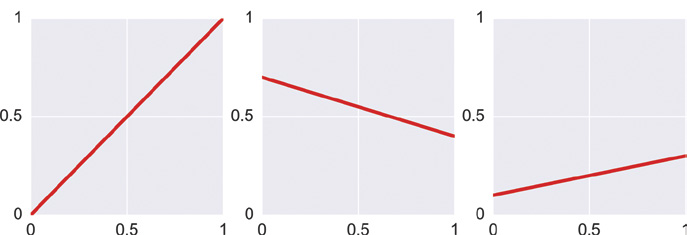


Figure 13-17: Straight-line functions. The leftmost function is called the identity function.

The other curves in Figure 13-17 are also straight lines, but they’re
tilted to different slopes. We call any curve that’s just a single straight line a
linear function, or even (slightly confusingly) a linear curve.

These activation functions do not prevent network collapse. When the
activation function is a single straight line, then mathematically, it’s only
doing multiplication and addition, and that means it’s a linear function and
the network can collapse. These straight-line activation functions usually
appear only in two specific situations.

The first application is on a network’s output neurons. There’s no
risk of collapse since there are no neurons after the output. The top of
Figure 13-18 shows the idea.

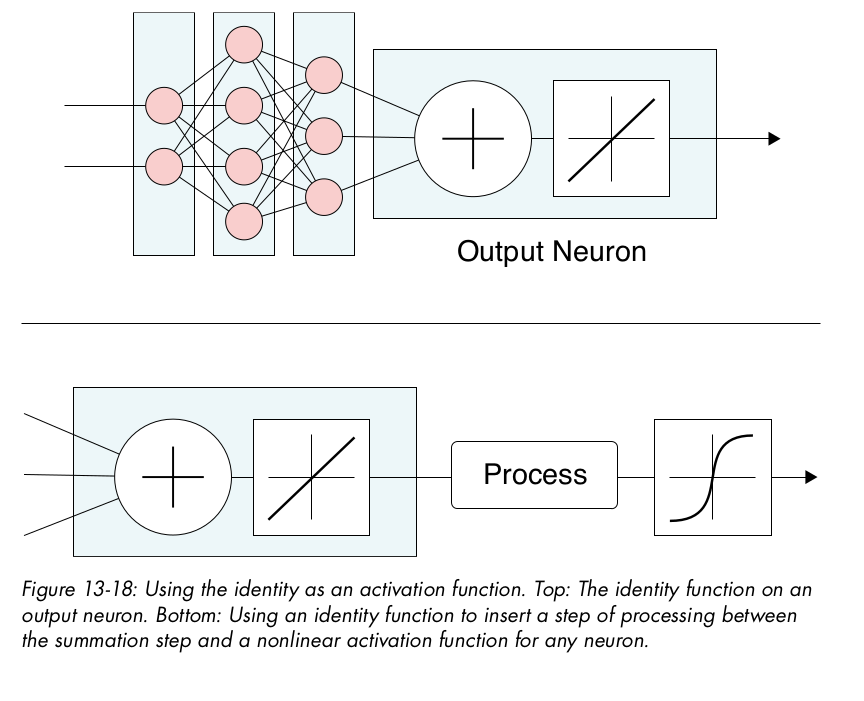

The second situation where we use a straight-line activation function is
when we want to insert some processing between the summation step in a
neuron and its activation function. In this case, we apply the identity func-
tion to the neuron, perform the processing step, and then perform the non-
linear activation function, as shown at the bottom of Figure 13-18.


Since we generally want nonlinear activation functions, we need to get
away from a single straight line. All of the following activation functions are
nonlinear and prevent network collapse.

## **Step Functions**

We don’t want a straight line, but we can’t pick just any curve. Our curve
needs to be single-valued. As we discussed in Chapter 5, this means that if
we look upward from any value of x along the X axis, there’s only one value
of y above us. An easy variation on a linear function is to start with a straight
line and break it up into several pieces. They don’t even have to join. This means that they don’t have to be continuous.

Figure 13-19 shows an example of this approach. We call this a stair-
step function. In this example, it outputs the value 0 if the input is from 0 to
just less than 0.2, but then the output is 0.2 if the input value is from 0.2
to just less than 0.4, and so on. These abrupt jumps don’t violate our rule
that the curve has only one y output value for each input x value.

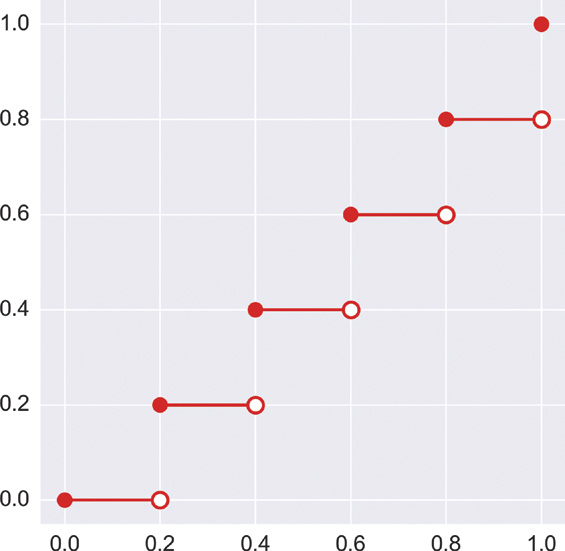

Figure 13-19: This curve is made up of multiple straight lines. A filled circle tells us that the
y value there is valid, whereas an open circle tells us that there is no curve at that point.

The simplest stair-step function has only a single step. This is a frequent
special case, so it gets its own name: the step function. The original percep-
tron of Figure 13-2 used a step function as its activation function. A step
function is usually drawn as in Figure 13-20(a). It has one value until some
threshold and then it has some other value.

Different people have different preferences for what happens when
the input has precisely the value of the threshold. In Figure 13-20(a) we’re
showing that the value at the threshold is the value of the right side of the
step, as shown by the solid dot.

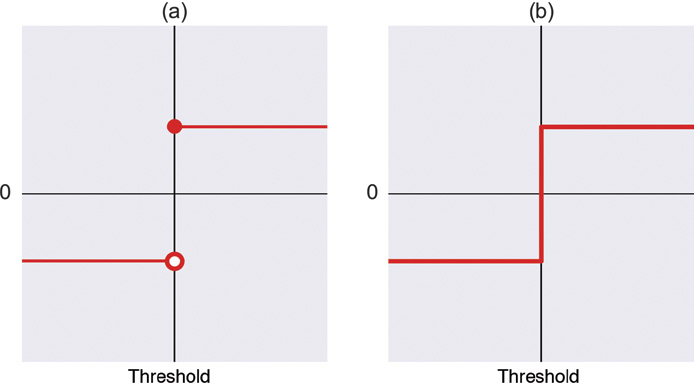

Figure 13-20: A step function has two fixed values, one each to the left and right of a
threshold value of x.

Often authors are casual about what happens when the input is
exactly at the transition, and draw the picture as in Figure 13-20(b)
in order to stress the “step” of the function. This is an ambiguous way
to draw the curve because we don’t know what value is intended when
the input is precisely at the threshold, but it’s a common kind of draw-
ing (often we don’t care which value is used at the threshold, so we can
choose whatever we prefer).

A couple of popular versions of the step have their own names. The unit
step is 0 to the left of the threshold, and 1 to the right. Figure 13-21 shows
this function.

If the threshold value of a unit step is 0, then we give it the more spe-
cific name of the Heaviside step, also shown in Figure 13-21.

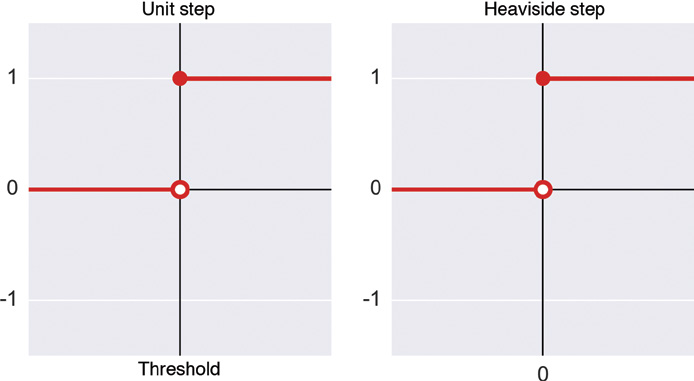

Finally, if we have a Heaviside step (so the threshold is at 0) but the
value to the left is −1 rather than 0, we call this the sign function, shown
in Figure 13-22. There’s a popular variation of the sign function where
input values that are exactly 0 are assigned an output value of 0. Both
variations are commonly called “the sign function,” so when the differ-
ence matters, it’s worth paying attention to figure out which one is being
referred to.

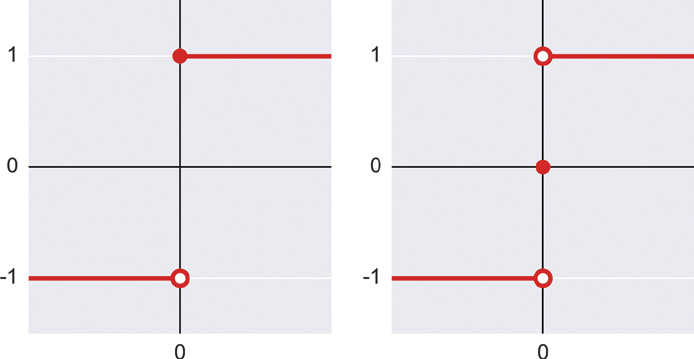

Figure 13-22: Two versions of the sign function. Left: Values less than 0 are assigned an
output of −1, all others are 1. Right: Like the left, except that an input of exactly 0 gets the
value 0.

## **Piecewise Linear Functions**

If a function is made up of several pieces, each of which is a straight line, we
call it piecewise linear. This is still a nonlinear function as long as the pieces,
taken together, don’t form a single straight line.


Perhaps the most popular activation function is a piecewise linear func-
tion called a rectifier, or rectified linear unit, which is abbreviated ReLU (note
that the e is lowercase). The name comes from an electronics part called a
rectifier, which can be used to prevent negative voltages from passing from
one part of a circuit to another (Kuphaldt 2017). When the voltage goes
negative, the physical rectifier clamps it to 0, and our rectified linear unit
does the same thing with the numbers that are fed into it.

The ReLU’s graph is shown in Figure 13-23. It’s made up of two straight
lines, but thanks to the kink, or bend, this is not a linear function. If the
input is less than 0, then the output is 0. Otherwise, the output is the same
as the input.

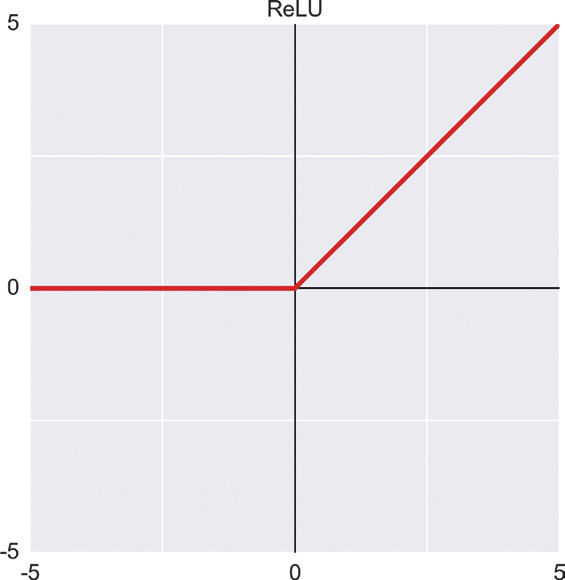

Figure 13-23: The ReLU, or rectified linear unit. It outputs 0 for all negative inputs,
otherwise the output is the input.

The ReLU activation function is popular because it’s a simple and
fast way to include a nonlinearity at the end of our artificial neurons. But
there’s a potential problem. As we’ll see in Chapter 14, if changes in the
input don’t lead to changes in the output, a network can stop learning. And the ReLU has an output of 0 for every negative value. If our input changes
from, say, –3 to –2, then the output of ReLU stays at 0. Fixing this problem
has led to the development of the ReLU variations that follow.

Despite this issue, ReLU (or leaky ReLU, which we’ll see next) often
performs well in practice, and people often use it as their default choice
when building a new network, particularly for fully connected layers.
Beyond the fact that these activation functions work well in practice, there
are good mathematical reasons for wanting to use ReLU (Limmer and
Stanczak 2017), though we won’t explore them here.


The leaky ReLU changes the response for negative values. Rather than
output a 0 for any negative value, this functions outputs the input, scaled
down by a factor of 10. Figure 13-24 shows this function.

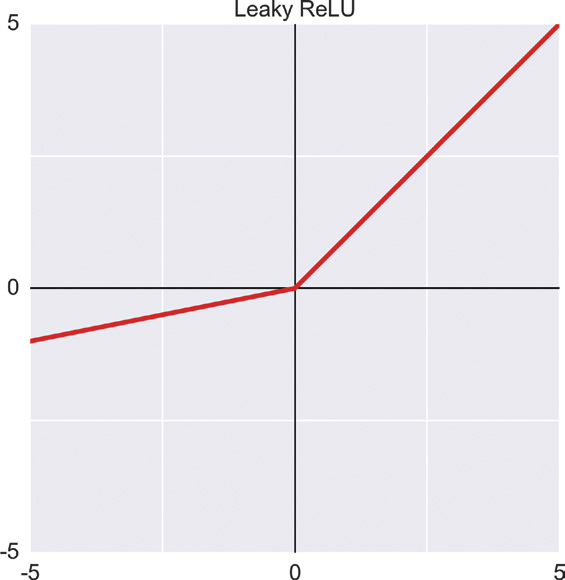

Figure 13-24: The leaky ReLU is like the ReLU, but it returns a scaled-down value
of x when x is negative.

Of course, there’s no need to always scale down the negative values
by a factor of 10. A parametric ReLU lets us choose by how much negative
amounts are scaled, as shown in Figure 13-25.


When using a parametric ReLU, the essential thing is to never select a
factor of exactly 1.0, because then we lose the kink, the function becomes
a straight line, and any neuron we apply this to collapses with those that
immediately follow it.

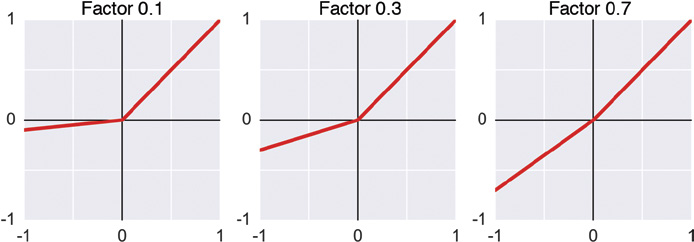

Figure 13-25: A parametric ReLU is like a leaky ReLU, but the slope for values of x that are
less than 0 can be specified.

Another variation on the basic ReLU is the shifted ReLU, which just
moves the bend down and left. Figure 13-26 shows an example.

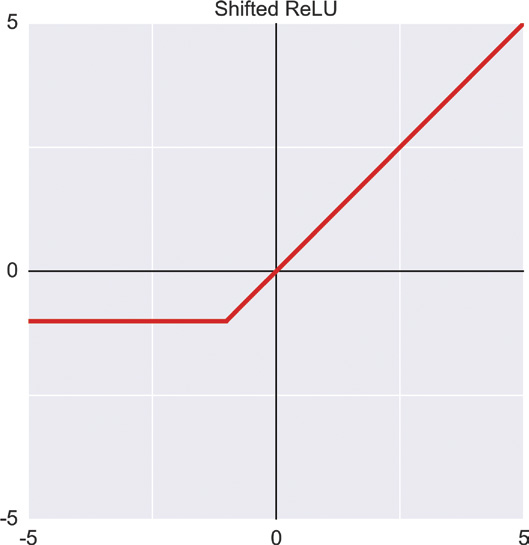

Figure 13-26: The shifted ReLU moves the bend in the ReLU function down and left.

We can generalize the various flavors of ReLU with an activation func-
tion called maxout (Goodfellow et al. 2013). Maxout allows us to define a
set of lines. The output of the function at each point is the largest value among all the lines, evaluated at that point. Figure 13-27 shows maxout
with just two lines, forming a ReLU, as well as two other examples that use
more lines to create more complex shapes.

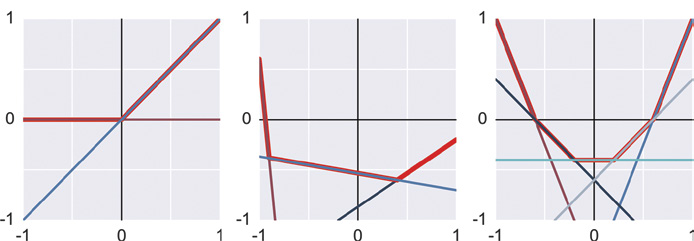


Figure 13-27: The maxout function lets us build up a function from multiple straight lines.
The heavy red line is the output of maxout for each set of lines.

Another variation on the basic ReLU is to add a small random value
to the input before running it through a standard ReLU. This function is
called a noisy ReLU.

**Smooth Functions**

As we’ll see in Chapter 14, a key step in teaching neural networks involves
computing derivatives for the outputs of neurons, which necessarily involve
their activation functions.

The activation functions that we saw in the last section (except for the
linear functions) create their nonlinearities by using multiple straight lines
with at least one kink in the collection. Mathematically, there is no deriva-
tive at the kink between a pair of straight lines, and therefore the function
is not linear.

If these kinks prevent the computation of derivatives, which are nec-
essary for teaching a network, why are functions like ReLU useful at all,
let alone so popular? It turns out that standard mathematical tools can
finesse the sharp corners like those in ReLU and still produce a derivative
(Oppenheim and Nawab 1996). These tricks don’t work on all functions,
but one of the principles that guided the development of the functions we
saw earlier is that they allow these methods to be used.

An alternative to using multiple straight lines and then patching up the
problems is to use smooth functions that inherently have a derivative everywhere. That is, they’re smooth everywhere. Let’s look at a few popular and
smooth activation functions.


The softplus function simply smooths out the ReLU, as shown in
Figure 13-28.

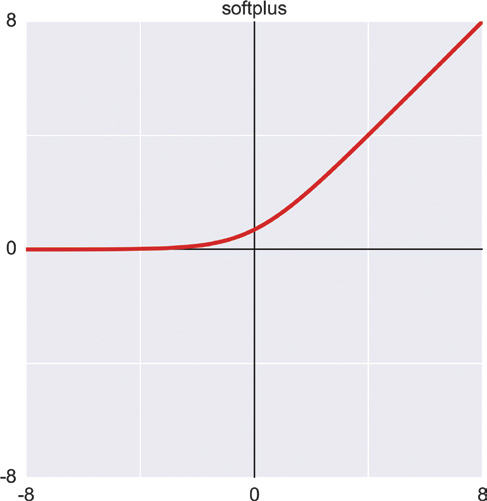

Figure 13-28: The softplus function is a smoothed version of the ReLU.

We can smooth out the shifted ReLU as well. This is called the exponen-
tial ReLU, or ELU (Clevert, Unterthiner, and Hochreiter 2016). It’s shown in
Figure 13-29.

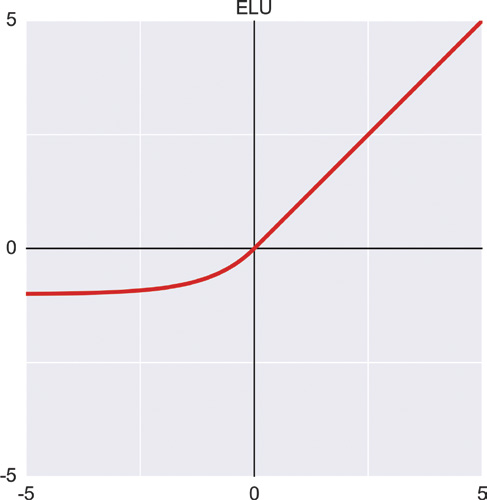

Figure 13-29: The exponential ReLU, or ELU

Another way to smooth out the ReLU is called swish (Ramachandran,
Zoph, and Le 2017). Figure 13-30 shows what this looks like. In essence
it’s a ReLU, but with a small, smooth bump just left of 0, which then flat-
tens out.

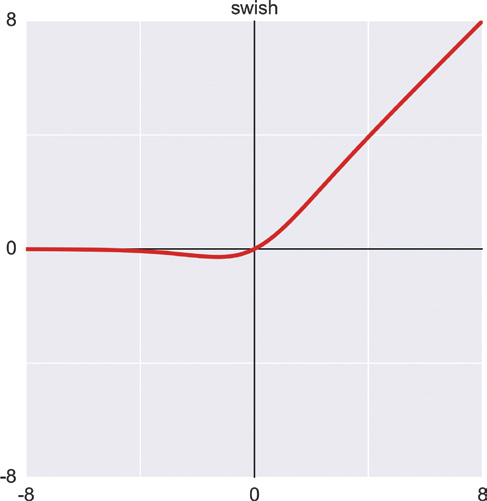

Figure 13-30: The swish activation function

Another popular smooth activation function is the sigmoid, also called
the logistic function or logistic curve. This is a smoothed-out version of the
Heaviside step. The name sigmoid comes from the resemblance of the curve
to an S shape, while the other names refer to its mathematical interpretation. Figure 13-31 shows this function.


Closely related to the sigmoid is another mathematical function called
the hyperbolic tangent. It’s much like the sigmoid, only negative values are
sent to –1 rather than to 0. The name comes from the curve’s origins in
trigonometry. It’s a big name, so it’s usually written simply as tanh. This is
shown in Figure 13-32.


We say that the sigmoid and tanh functions both squash their entire
input range from negative to positive infinity into a small range of output
values. The sigmoid squashes all inputs to the range [0, 1], while tanh
squashes them to [−1, 1].

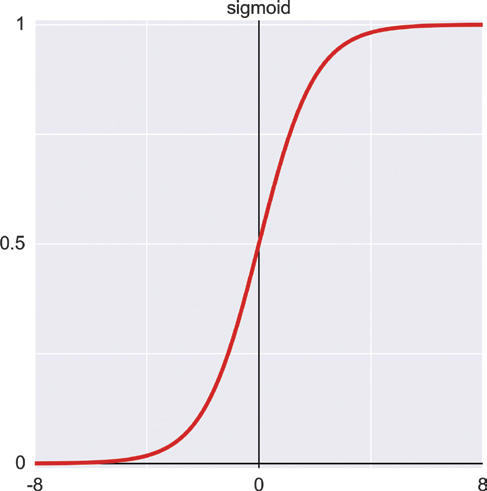

Figure 13-31: The S-shaped sigmoid function is also called the logistic function or logis-
tic curve. It has a value of 0 for very negative inputs, and a value of 1 for very positive
inputs. For inputs in the range of about −6 to 6, it smoothly transitions between the two.

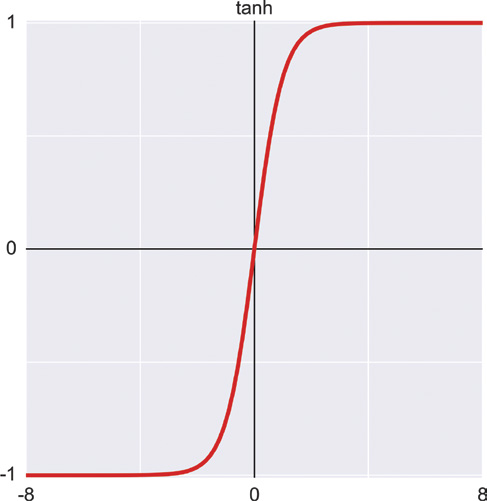

Figure 13-32: The hyperbolic tangent function, written tanh, is S-shaped like the sigmoid
of Figure 13-31. The key differences are that it returns a value of −1 for very negative
inputs, and the transition zone is a bit narrower.

The two are shown on top of one another in Figure 13-33.

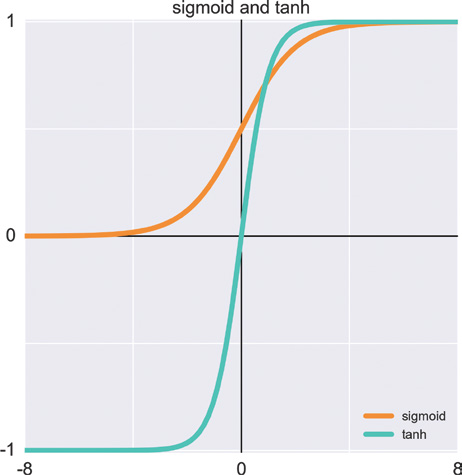

Figure 13-33: The sigmoid function (orange) and tanh function (teal),
both plotted for the range −8 to 8

Another smooth activation function uses a sine wave, as shown in
Figure 13-34 (Sitzmann 2020). This squashes the outputs to the range
[–1, 1] like tanh, but it doesn’t saturate (or stop changing) for inputs that
are far from 0.

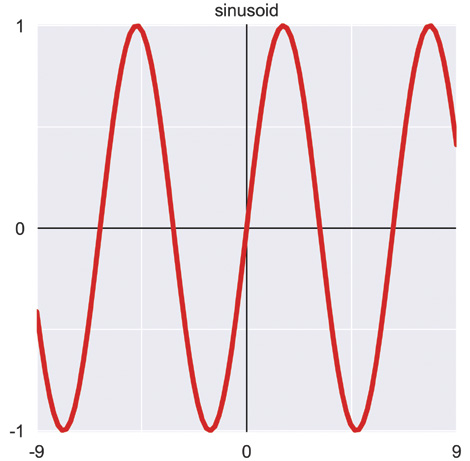

Figure 13-34: A sine wave activation function

## **Activation Function Gallery**

Figure 13-35 summarizes the activation functions we’ve discussed.

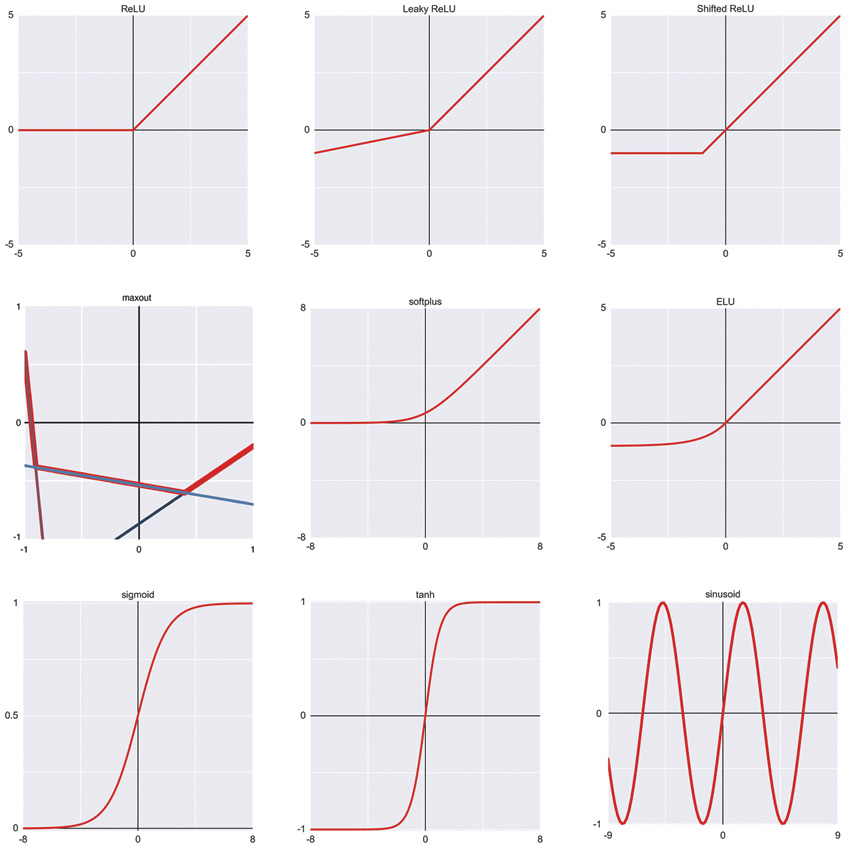

Figure 13-35: A gallery of popular activation functions

## **Comparing Activation Functions**

ReLU used to be the most popular activation function, but in recent years,
the leaky ReLU has been gaining in popularity. This is a result of practice:
networks with leaky ReLU often learn faster.


The reason is that ReLU has a problem, which we mentioned earlier.
When a ReLU’s input is negative, its output is 0. If the input is a large negative number, then changing it by a small amount still results in a negative input to ReLU and an unchanged output of 0. This means that the deriva-
tive is also zero. When a neuron’s derivative goes
to zero, not only does it stop learning, but it also makes it more likely that
the neurons that precede it in the network will stop learning as well. Because
a neuron whose output never changes no longer participates in learning, we
sometimes use rather drastic language and say that the neuron has died. The
leaky ReLU has been gaining in popularity over ReLU because, by providing
an output that isn’t the same for every negative input, its derivative is not 0,
and thus it does not die. The sine wave function also has a non-zero deriva-
tive almost everywhere (except at the very top and bottom of each wave).

After ReLU and leaky ReLU, sigmoid and tanh are probably the next
most popular functions. Their appeal is that they’re smooth, and the out-
puts are bounded to [0, 1] or [–1, 1]. Experience has shown that networks
learn most efficiently when all the values flowing through it are in a limited
range.

There is no firm theory to tell us which activation function works best
in a specific layer of a specific network. We usually start by making the same
choices that have worked in other, similar networks that we’ve seen, and
then we try alternatives if learning goes too slowly.

A few rules of thumb give us a good starting point in many situations.
Generally speaking, we often apply ReLU or leaky ReLU to most neurons
on hidden layers, particularly fully connected layers. For regression net-
works, we often use no activation function on the final layer (or if we must
supply one, we use a linear activation function, which amounts to the same
thing), because we care about the specific output value. When we’re classify-
ing with just two classes, we have just a single output value. Here we often
apply a sigmoid to push the output clearly to one class or the other. For clas-
sification networks with more than two classes, we almost always use a some-
what different kind of activation function, which we’ll look at next.

## **Softmax**

There’s an operation that we typically apply only to the output neurons of
a classifier neural network, and even then, only if there are two or more
output neurons. It’s not an activation function in the sense that we’ve been
using the term because it takes as input the outputs of all the output neu-
rons simultaneously. It processes them together and then produces a new
output value for each neuron. Though it’s not quite an activation function,
it’s close enough in spirit to activation functions to merit including it in this
discussion.


The technique is called softmax. The purpose of softmax is to turn
the raw numbers that come out of a classification network into class
probabilities.


It’s important to note that softmax takes the place of any activation
function we’d otherwise apply to those output neurons. That is, we give
them no activation function (or, equivalently, apply the linear function)
and then run those outputs into softmax.

The mechanics of this process are involved with the mathematics of
how the network computes its predictions, so we won’t go into those details
here. The general idea is shown in Figure 13-36: scores come in, and prob-
abilities come out.

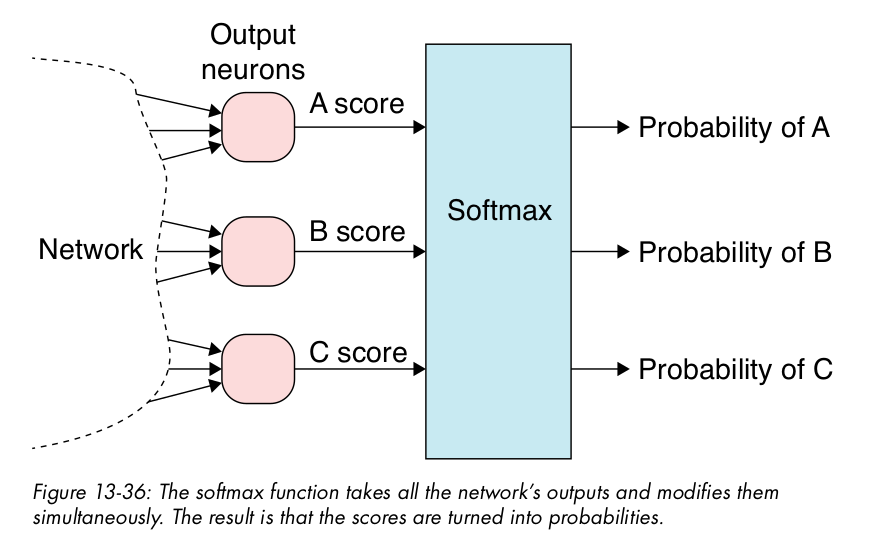

Each output neuron presents a value, or score, that corresponds to how
much the network thinks the input is of that class. In Figure 13-36 we’re
assuming that we have three classes in our data, named A, B, and C, so
each of the three output neurons gives us a score for its class. The larger
the score, the more certain the system is that the input belongs to that class.

If one class has a larger score than some other class, it means the net-
work thinks that class is more likely. That’s useful. But the scores aren’t
designed to be compared in any other convenient way. For instance, if the
score for A is twice that of B, it doesn’t mean that A is twice as likely as B. It
just means that A is more likely. Because making comparisons like “twice
as likely” is so useful, we use softmax to turn the output scores into prob-
abilities. Now, if the softmax output of A is twice that of B, then indeed A is
twice as probable as B. That’s such a useful way to look at the network’s out-
put that we almost always use softmax at the end of a classification network.

Any set of numbers that we want to treat as probabilities must satisfy
two criteria: the values all lie between 0 and 1, and they add up to 1. If we
just modify each output of the network independently, we don’t know the
other values, so we can’t make sure they added up to anything in particular.
When we hand all the outputs to softmax, it can simultaneously adjust all
the values so that they sum to 1.

Let’s look at softmax in action. Consider the top-left graph of
Figure 13-37.

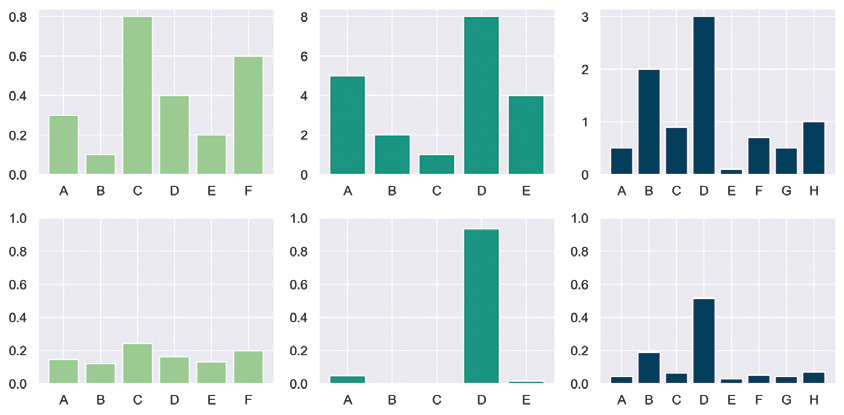

Figure 13-37: The softmax function takes all the network’s outputs and modifies them simultaneously. The result
is that the scores are turned into probabilities. Top row: Scores from a classifier. Bottom row: Results of run-
ning the scores in the top row through softmax. Note that the graphs in the upper row use different vertical

The top left of Figure 13-37 shows the outputs for a classifier with six
output neurons, which we’ve labeled A through F. In this example, all
six of these values are between 0 and 1. From this graph, we can see
that the value for class B is 0.1 and the value for class C is 0.8. As we’ve
discussed, it is a mistake to conclude from this that the input is 8 times
more likely to be in class C than class B, because these are scores and
not probabilities. We can say that class C is more likely than class B, but
anything more requires some math. To usefully compare these outputs
to one another, we can apply softmax to carry out that math, and change
them into probabilities.

We show the output of softmax in the graph in the lower left. These
are the probabilities of the input belonging to each of the six classes. It’s
interesting to note that the big values, like C and F, get scaled down by a
lot, but the small values, like B, are hardly scaled at all. This is a natural
result of how scores between 0 and 1 turn into probabilities. But the order-
ing of the bars by size is still the same as it was for the scores (with C the
largest, then F, then D, and so on). From the probabilities produced by
softmax in the lower figure, we can see that class C has a probability of
about 0.25, and class B has a probability of about 0.15. We can conclude
that the input is a little more than 1.5 times more probable to be in class C
than class B.

The middle and right columns of Figure 13-37 show the outputs for
two other hypothetical networks and inputs, before and after softmax.
The three examples show that the output of softmax depends on whether
the inputs are all less than 1. The input ranges in Figure 13-37, reading
left to right, are [0, 0.8], [0, 8], and [0, 3]. Softmax always preserves the ordering of its inputs (that is, if we sort the inputs from largest to small-
est, they match a similar sort on the outputs). But when some input values
are greater than 1, the largest value tends to stand out more. We say that
softmax exaggerates the influence of the output with the largest value.
Sometimes we also say that softmax crushes the other values, making the
largest one dominate the others more obviously.

Figure 13-37 shows that the input range makes a big difference in the
output of softmax. Softmax also has an interesting behavior depending on
whether the inputs values are all less than 1, all greater than 1, or mixed.


At the far left of Figure 13-37 all of the inputs are all less than 1, in the
range [0, 0.8].



In the middle column, the inputs are all greater than 1, in the range
[0, 8]. Notice that in the output, the value of D (corresponding to the 8)
clearly dominates all of the other values. Softmax has exaggerated the dif-
ferences among the outputs, making it easier to pick out D as the largest.


On the far right of Figure 13-37 we have values both less and greater
than 1, in the range [0, 3]. Here the exaggeration effect is somewhere
between the left column, where all inputs are less than 1, and the middle
column, where all inputs are greater than 1.



In all cases, though, softmax gives us back probabilities that are each
between 0 and 1, and sum up to 1. The ordering of the inputs is always
preserved, so the sequence of largest to smallest input is also the largest to
smallest output.